   # NOTEBOOK PROJET 4                                               TANGUY MATHIEU

In [1]:
# mise en place des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Avant d'utiliser les 4 dossiers fournis j'ai à chaque fois procédé à un df.info() pour vérifier d'abord le type des valeurs de chaque table et s'il y avait des valeurs nulles ou non, puis un df.describe() pour vérifier s'il n'y avait pas de valeurs aberrantes.

# 1ERE PARTIE : QUESTIONS DE MARC

# Question 1: Proportion de personnes en sous nutrition

In [2]:

# Chargement du dossier sous nutrition
sous_nutrition = pd.read_csv('sous_nutrition.csv')

# Remplacement de la valeur 2016-2018 par 2017
sous_nutrition = sous_nutrition.replace(to_replace = "2016-2018", value = "2017")

# Remplacement de la valeur <0.1 par 0
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].replace("<0.1","0")

# Changement de type pour les données 'Valeur'
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].astype(float)

# Calcul de la totalité de personne sous nutri en 2017
sous_nutrition_2017 = sous_nutrition.loc[(sous_nutrition['Année'] == '2017'), :].sum()
print('Le nombre de personnes sous nutri en 2017 était de', sous_nutrition_2017['Valeur'], 'millions')

# Chargement du dossier population
population = pd.read_csv('population.csv')

# Selection de la population pour 2017
population_2017 = population[population['Année']==2017]

# Calcul de la population mondiale en 2017
population_monde_2017 = population_2017['Valeur'].sum()
print('La population mondiale en 2017 était de', round(population_monde_2017/1000000,2), 'milliards d_habitants')

# Calcul de la proportion de personne en sous nutrition en 2017
proportion_monde_sous_aliment = round((sous_nutrition_2017['Valeur']*100)/(population_monde_2017/1000),2)
print('La proportion de personnes en état de sous nutrition en 2017 était de',proportion_monde_sous_aliment, '%')

Le nombre de personnes sous nutri en 2017 était de 535.7 millions
La population mondiale en 2017 était de 7.55 milliards d_habitants
La proportion de personnes en état de sous nutrition en 2017 était de 7.1 %


### On peut se représenter ceci en imaginant que c'est la population totale des Etats unis d'Amérique et de l'Indonésie réunis qui est en sous nutrition ou encore les 2/3 de l'Europe.

# Question 2: Nombre theorique de personnes qui pourraient être nourries

In [3]:

# Chargement du dossier disponibilité alimentaire
dispo_alim = pd.read_csv('dispo_alimentaire.csv')

# Calcul de la disponibilité alimentaire par pays
dispo_alim_pays = dispo_alim.groupby('Zone').sum()

# Regroupement du tableau population et de disponibilité alimentaire
popu_dispo_alim = pd.merge(dispo_alim_pays, population_2017, on = 'Zone')

# Création de la colonne disponibilité alimentaire par pays
popu_dispo_alim['Disponibilité alimentaire par pays'] = popu_dispo_alim['Disponibilité alimentaire (Kcal/personne/jour)'] * popu_dispo_alim['Valeur']

# Calcul du nombre de kcal par jour dans le monde
dispo_alim_kcal = round(popu_dispo_alim['Disponibilité alimentaire par pays'].sum())
print('Le nombre de kcal disponible dans le monde par jour en 2017 était de',dispo_alim_kcal, 'kcal/monde/jour')

# Calcul du nombre théorique de personnes nourries en 2017 avec une base de 2500kcal par personne par jour
nombre_theo_personne_nourrie = dispo_alim_kcal*365/ (2500*365)
print('Le nombre de personnes qui pouvaient être nourries était de ', round(nombre_theo_personne_nourrie/1000000,2), 'milliards')


# Proportion de personnes qui auraient pu être nourries en 2017
proportion_personnes_nourries_2017 = nombre_theo_personne_nourrie * 100 / population_2017['Valeur'].sum()
print('La proportion de personnes qui pourraient être nourries en fonction de la population réelle est de',round(proportion_personnes_nourries_2017,2), '%')



Le nombre de kcal disponible dans le monde par jour en 2017 était de 20918984627 kcal/monde/jour
Le nombre de personnes qui pouvaient être nourries était de  8.37 milliards
La proportion de personnes qui pourraient être nourries en fonction de la population réelle est de 110.86 %


### Ceci est un chiffre sorti de son contexte puisque nous avons intégré toutes las catégories alimentaires mais il nous donne quand même une idée des capacités que nous pouvons avoir si tous les pays se mettent en commun.

# Question 3: Disponibilité des produits végétaux

In [30]:

# Selection des aliments végétaux
dispo_alim_vegetale = dispo_alim.loc[dispo_alim['Origine']  == 'vegetale']

# Groupage des végétaux par pays
dispo_alim_vegetale_pays = dispo_alim_vegetale.groupby('Zone').sum()

# Groupage du tableau population 2017 avec le tableau de disponibilité végétale par pays
popu_dispo_alim = pd.merge(dispo_alim_vegetale_pays, population_2017, on = 'Zone')

# Creation de la colonne disponibilité végétale par pays 
popu_dispo_alim['Disponibilité alimentaire vegetale par pays'] = popu_dispo_alim['Disponibilité alimentaire (Kcal/personne/jour)']*popu_dispo_alim['Valeur']

# Calcul de la disponibilité végétale dansle  monde par jour
dispo_alim_vegetale_kcal = round(popu_dispo_alim['Disponibilité alimentaire vegetale par pays'].sum())
print('la disponibilité végétale par jour dans le monde en 2017 était de', dispo_alim_vegetale_kcal, 'kcal végétale/jour/monde')

# Nombre théorique de personnes nourries en 2017 par les aliments végétaux en utilisant 2500kcal par personne en moyenne
nombre_theo_personne_nourrie_vegetale = dispo_alim_vegetale_kcal*365/ (2500*365)
print('le nombre de personnes qui pouvaient être nourries en 2017 était de ', round(nombre_theo_personne_nourrie_vegetale/1000000,2), 'milliards')

# La proportion de personnes pouvant être nourries en 2017 par les aliments végétaux 
proportion_personnes_nourries_2017_vegetale = round(nombre_theo_personne_nourrie_vegetale *100 / population_2017['Valeur'].sum(),2)
print('la proportion de personnes qui pourraient être nourries par les ressources vegetales est de', proportion_personnes_nourries_2017_vegetale, '%')

la disponibilité végétale par jour dans le monde en 2017 était de 17260764212 kcal végétale/jour/monde
le nombre de personnes qui pouvaient être nourries en 2017 était de  6.9 milliards
la proportion de personnes qui pourraient être nourries par les ressources vegetales est de 91.47 %


### Ceci est aussi un chiffre sorti de son contexte puisqu'il n'indique pas non plus les différentes proportions d'utilisations des produits végétaux mais il nous donne tout de même une bonne piste pour savoir vers où aller afin de réduire la sous nutrition.

# Question 4: Utilisation de la disponibilité intérieure et des différentes parts

la part de l_alimentation animale est de 13.24 %
la part de l_alimentation humaine est de 49.51 %
la part des pertes totales est de 4.61 %
la part de la semences est de 1.57 %
la part du traitement est de 22.38 %
la part des autres  utilisations est de 8.78 %


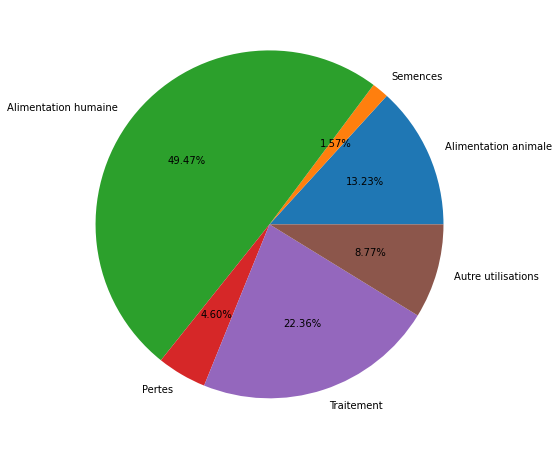

In [24]:

# Chargement du dossier disponibilité alimentaire
dispo_alim = pd.read_csv('dispo_alimentaire.csv')

# Calcul de la nourriture pour animaux
alim_animaux = dispo_alim['Aliments pour animaux'].sum()

# Calcul de la disponibilité intérieure totale
dispo_interieure = dispo_alim['Disponibilité intérieure'].sum()

# Proportion alimentation animale
propo_alim_animaux = round(alim_animaux*100/dispo_interieure, 2)
print('la part de l_alimentation animale est de',propo_alim_animaux, '%')

# Calcul de la part de nourriture
nourriture = dispo_alim['Nourriture'].sum()

# Proportion de l'alimentation humaine
alim_humaine = round(nourriture*100/dispo_interieure, 2)
print('la part de l_alimentation humaine est de', alim_humaine, '%')

# Calcul des pertes
pertes = dispo_alim['Pertes'].sum()

# Proportion des pertes
propo_pertes = round(pertes*100/dispo_interieure, 2)
print('la part des pertes totales est de', propo_pertes, '%')

# Calcul des semences
semences = dispo_alim['Semences'].sum()

# Proportion des semences
propo_semences= round(semences*100/dispo_interieure, 2)
print('la part de la semences est de',  propo_semences, '%')

# Calcul des traitements
traitement = dispo_alim['Traitement'].sum()

# Proportion des traitements
propo_traitement = round(traitement*100/dispo_interieure, 2)
print('la part du traitement est de', propo_traitement, '%')

# Calcul des autres utilisations
autre = dispo_alim['Autres Utilisations'].sum()

# Proportion des autres utilisations
propo_autre = round(autre*100/dispo_interieure, 2)
print('la part des autres  utilisations est de', propo_autre, '%')

# Création d'un diagramme circulaire

plt.figure(figsize = (8,8))
plt.pie(labels = ['Alimentation animale','Semences','Alimentation humaine', 'Pertes', 'Traitement', 'Autre utilisations' ],
        x=[13.24,1.57, 49.51, 4.60,  22.38, 8.78],
        autopct='%.2f%%')
plt.show()

### On peut observer que l'alimentation humaine ne représente que la moité de l'utilisation de la disponibilité intérieur . Nous pouvons donc imaginer que nous pourrions procéder à une meilleure optimisation de cette disponibilité par exemple en réduisant la part du traitement pour que cette part aille plus vers l'alimentation humaine.

# 2EME PARTIE : QUESTIONS DE MELANIE

# Question 1: Les pays dont la proportion de personnes sous alimentés est la plus forte

In [6]:

# On utilise les dossiers sous nutrition et population déjà utilisés dans les questions précédantes

# Selection de la population pour 2017
population_2017 = population[population['Année']==2017]


# Selection des personnes en sous nutrition en 2017 dans chaque pays
sous_nutrition_2017 = sous_nutrition.loc[(sous_nutrition['Année'] == '2017'), :]

# Groupage du tableau population 2017 et du tableau sous nutrition 2017
sous_nutri_popu_2017 = pd.merge(sous_nutrition_2017, population_2017, on = 'Zone')

# Creation colonne proportion de sous nutrition par pays 
sous_nutri_popu_2017['proportion sous nutrition']=round(sous_nutri_popu_2017['Valeur_x']*100000/sous_nutri_popu_2017['Valeur_y'],2)

# Les 10 pays ayant la plus forte proportion de personnes en sous nutrition
dix_pays_sous_nutri_popu_2017 = sous_nutri_popu_2017.sort_values(by = 'proportion sous nutrition', ascending = False).head(10)
dix_pays_sous_nutri_popu_2017 = dix_pays_sous_nutri_popu_2017.drop(columns= ['Année_x','Valeur_x','Année_y','Valeur_y'])
dix_pays_sous_nutri_popu_2017


,Zone,proportion sous nutrition
78,Haïti,48.26
157,République populaire démocratique de Corée,47.19
108,Madagascar,41.06
103,Libéria,38.28
100,Lesotho,38.25
183,Tchad,37.96
161,Rwanda,35.06
121,Mozambique,32.81
186,Timor-Leste,32.17
0,Afghanistan,28.93


### On peut constater que ces pays sont pour la plupart des pays ayant régulièrement soit des problèmes majeurs climatiques comme pour Haïti par exemple où des problèmes majeurs de guerres comme par exemple le Libéira, le Tchad ou encore le Rwanda. Les causes de sous nutrition ne sont donc pas forcément dûes au manque de disponibilité alimentaire mais aussi également à des problèmes contextuels.

# Question 2: Les pays ayant le plus bénéficié d'aide depuis 2013

In [7]:

# Chargement du dossier aide alimentaire
aide_alim = pd.read_csv('aide_alimentaire.csv')

# Groupage de l'aide alimentaire par pays
aide_alim_pays = aide_alim.groupby('Pays bénéficiaire').sum()

# On enlève la colonne Année qui n'est plus utile
aide_alim_pays = aide_alim_pays.drop(columns = ['Année'])

# Sélection des 10 pays ayant le plus bénéficié d'aide alimentaire en tonnes
aide_alim_pays.sort_values(by = 'Valeur', ascending = False).head(10)



,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


### On peut constater que les pays ayant le plus bénéficié d'aide depuis 2013 ne sont pas les même que les pays ayant le plus de personnes en état de sous nutrition. On peut donc se poser la question de savoir comment sont attribué les aides alimentaires (critères, quantités, accessibilités,...etc).

# Question 3: Les pays ayant le plus et le moins de disponibilité alimentaire par habitant

In [8]:
# On utilise le tableau unifié de la population 2017 et de la disponibilité alimentaire utilisé en partie 1 question 3
 
# Les 10 pays ayant le plus de disponibilité alimentaire en 2017

pays_plus_dispo = popu_dispo_alim.sort_values(by = "Disponibilité alimentaire (Kcal/personne/jour)", ascending = False).head(10)
pays_plus_dispo[['Zone',"Disponibilité alimentaire (Kcal/personne/jour)"]]


,Zone,Disponibilité alimentaire (Kcal/personne/jour)
166,Égypte,3188.0
157,Turquie,3141.0
97,Maroc,3071.0
155,Tunisie,2971.0
3,Algérie,2915.0
42,Cuba,2906.0
57,Ghana,2874.0
83,Koweït,2794.0
74,Israël,2793.0
70,Iran (République islamique d'),2784.0


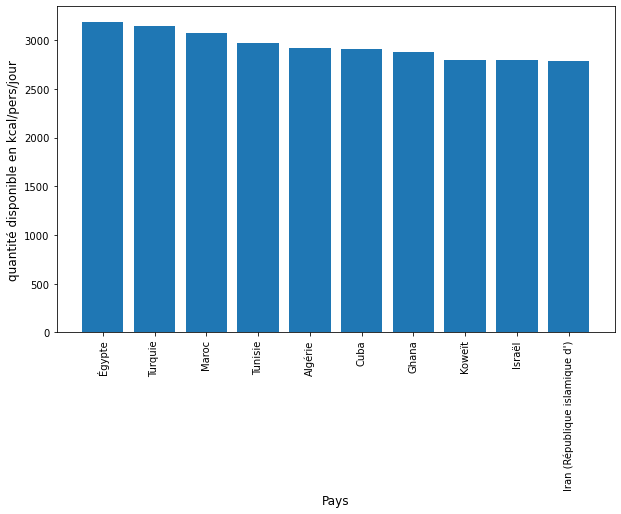

In [22]:
# Graphique des 10 pays ayant le plus de disponibilité alimentaire en 2017

x = np.arange(10)
plt.figure(figsize=(10,6))
plt.bar(height=pays_plus_dispo['Disponibilité alimentaire (Kcal/personne/jour)'], x=pays_plus_dispo['Zone'])
plt.xticks(rotation=90)
plt.ylabel('quantité disponible en kcal/pers/jour',size = 12)
plt.xlabel('Pays', size = 12)
plt.show()

In [10]:
# Les 10 pays ayant le moins de disponibilité alimentaire en 2017

pays_moins_dispo = popu_dispo_alim.sort_values(by ="Disponibilité alimentaire (Kcal/personne/jour)" , ascending = True).head(10)
pays_moins_dispo[['Zone',"Disponibilité alimentaire (Kcal/personne/jour)"]]

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
6,Antigua-et-Barbuda,1635.0
127,République centrafricaine,1673.0
101,Mongolie,1679.0
168,Équateur,1732.0
19,Bolivie (État plurinational de),1790.0
164,Zambie,1818.0
136,Sainte-Lucie,1820.0
134,Saint-Kitts-et-Nevis,1821.0
143,Soudan,1824.0
13,Bahamas,1828.0


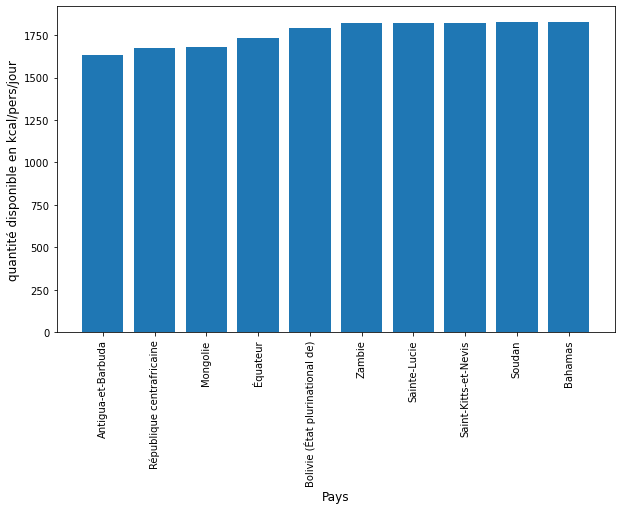

In [23]:
# Graphique des 10 pays ayant le moins de disponibilité alimentaire en 2017

x = np.arange(10)
plt.figure(figsize = (10,6))
plt.bar(height=pays_moins_dispo["Disponibilité alimentaire (Kcal/personne/jour)"], x=pays_moins_dispo['Zone'])
plt.xticks(rotation=90)
plt.ylabel('quantité disponible en kcal/pers/jour',size = 12)
plt.xlabel('Pays', size = 12)
plt.show()

### On peut donc voir en comparant le pays ayant le plus de disponibilité et celui en ayant le moins que le rapport est du double, ce qui peut nous interroger sur la répartition entre les pays. Pourrait on imaginer qu'avec une meilleure répartition des denrées alimentaires nous pourrions nourrir correctement la plus grande majorité de la population mondiale?

# Question  sur l'alimentation humaine et animale dans les céréales

La Proportion d'alimentation animale en 2017 était de : 69.3 %
La Proportion d'alimentation humaine en 2017 était de 18.1 %
La Proportion de semences en 2017 était de  7.2 %
La Proportion de pertes en 2017 était de 2.6 %
La Proportion du traitement en 2017 était de 0.4 %
La Proportion des autres utilisations en 2017 était de 3.1 %


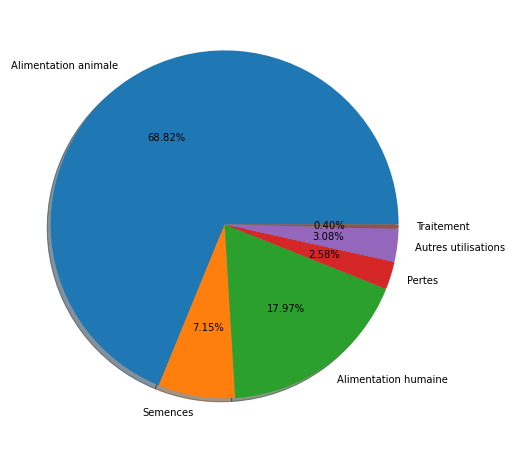

In [32]:
# On definie la liste des céréales
liste_cereales = ["Blé et produits", "Riz et produits", "Orge et produits", "Maïs et produits", "Seigle et produits",
                  "Avoine", "Millet et produits", "Sorgho et produits", "Céréales, Autres"]

# Création d'un tableau ne contenant que les informations des céréales
cereales = dispo_alim.loc[dispo_alim['Produit'].isin(liste_cereales),:] 

# Calcul de la proportion d'alimentation animale
print("La Proportion d'alimentation animale en 2017 était de :", 
      round(cereales['Aliments pour animaux'].sum()*100/cereales['Disponibilité intérieure'].sum(),1), "%")

# Calcul de la proportion d'alimentation humaine
print("La Proportion d'alimentation humaine en 2017 était de", 
      round(cereales['Nourriture'].sum()*100/cereales['Disponibilité intérieure'].sum(),1), "%")

# Calcul des autres proportions 
print("La Proportion de semences en 2017 était de ",
      round(cereales['Semences'].sum()*100/cereales['Disponibilité intérieure'].sum(),1), "%")
print("La Proportion de pertes en 2017 était de",
      round(cereales['Pertes'].sum()*100/cereales['Disponibilité intérieure'].sum(),1), "%")
print("La Proportion du traitement en 2017 était de",
      round(cereales['Traitement'].sum()*100/cereales['Disponibilité intérieure'].sum(),1), "%")
print("La Proportion des autres utilisations en 2017 était de",
      round(cereales['Autres Utilisations'].sum()*100/cereales['Disponibilité intérieure'].sum(),1), "%")


# Graphique circulaire
plt.figure(figsize = (8,8))
plt.pie(labels = ['Alimentation animale','Semences','Alimentation humaine', 'Pertes',  'Autres utilisations','Traitement' ],
        x=[69.3,7.2, 18.1, 2.6,  3.1, 0.4],autopct='%.2f%%', shadow = True)
plt.show()

### On peut constater que la part de l'alimentation humaine est très faible par rapport à l'alimentation animale et donc on pourrait imaginer une meilleur répartition de  cette utilisation des céréales pour nourrir plus de personnes au niveau mondial.

# Question annexe sur la thailande

In [13]:
# On utilise le tableau unifié de la population 2017 et de la sous nutrition utilisé dans la partie 2 question 1

# Proportion de personnes en sous nutrition en 2017 en Thailande
sous_nutri_popu_2017.loc[(sous_nutri_popu_2017['Zone'] == 'Thaïlande')]
taux_sous_nutri_thai = sous_nutri_popu_2017.loc[(sous_nutri_popu_2017['Zone'] == 'Thaïlande')]
taux_sous_nutri_thai

,Zone,Année_x,Valeur_x,Année_y,Valeur_y,proportion sous nutrition
185,Thaïlande,2017,6.2,2017,69209.81,8.96


### RAPPEL: la proportion mondiale de la sous nutrition calculée dans la  question 1 partie 1 était de 7.09%

In [33]:
# Calcul de de la proportion d'exportation du Manioc en Thailande en 2017 par rapport à la production de celui ci

thai_manioc = dispo_alim.loc[(dispo_alim['Produit'] == "Manioc") & (dispo_alim['Zone'] == "Thaïlande"),:]
print('La Proportion d_exportation du Manioc en Thailande en 2017 était de', 
      round(thai_manioc['Exportations - Quantité'].sum()*100/thai_manioc['Production'].sum(),2), "%")
                                                                 

La Proportion d_exportation du Manioc en Thailande en 2017 était de 83.41 %


### La Thailande est le 2eme plus gros producteur et exportateur de Manioc dans le monde derrière le Nigéria et pourtant le taux de personnes en sous nutrition est plus élevé que la moyenne et ceci peut être dû au fait qu'ils n'utilisent pas le Manioc dans leur base alimentaire 

# Recherche s'il existe un lien entre une forte proportion de personnes en sous nutrition et un taux d'exportation élevé

In [15]:
# Calcul du taux exportation des pays en fonction de la disponibilité intérieure
dispo_alim_pays['proportion exportation'] = dispo_alim_pays['Exportations - Quantité']*100/dispo_alim_pays['Disponibilité intérieure']
dispo_alim_pays_export = dispo_alim_pays[['proportion exportation']]

# Sélection des colonnes zone et proportion sous nutrition
sous_nutrition_popu_2017 = sous_nutri_popu_2017[['Zone','proportion sous nutrition']]

# Groupage de deux tableaux entre la disponibilité alimentaire et la sous nutrition
sous_nutri_export = pd.merge(dispo_alim_pays_export, sous_nutri_popu_2017, on = 'Zone')

# Sélection des colonnes zone, proportion exportation et proportion sous nutrition
sous_nutri_export = sous_nutri_export[['Zone','proportion exportation','proportion sous nutrition']]

# Sélection des 20 pays dont la proportion de sous nutrition est supérieur à la moyenne de 7.09 et classement descendant
sous_nutri_export_propo = sous_nutri_export.loc[(sous_nutri_export['proportion sous nutrition']>=7.1)]
sous_nutri_export_propo20 = sous_nutri_export_propo.sort_values(by = 'proportion sous nutrition', ascending = False).head(20)
sous_nutri_export_propo20

,Zone,proportion exportation,proportion sous nutrition
65,Haïti,0.242915,48.26
132,République populaire démocratique de Corée,0.557946,47.19
91,Madagascar,1.550999,41.06
87,Libéria,1.698302,38.28
84,Lesotho,3.312629,38.25
150,Tchad,0.000000,37.96
126,Rwanda,3.292222,35.06
103,Mozambique,1.902556,32.81
152,Timor-Leste,5.145414,32.17
0,Afghanistan,2.056974,28.93


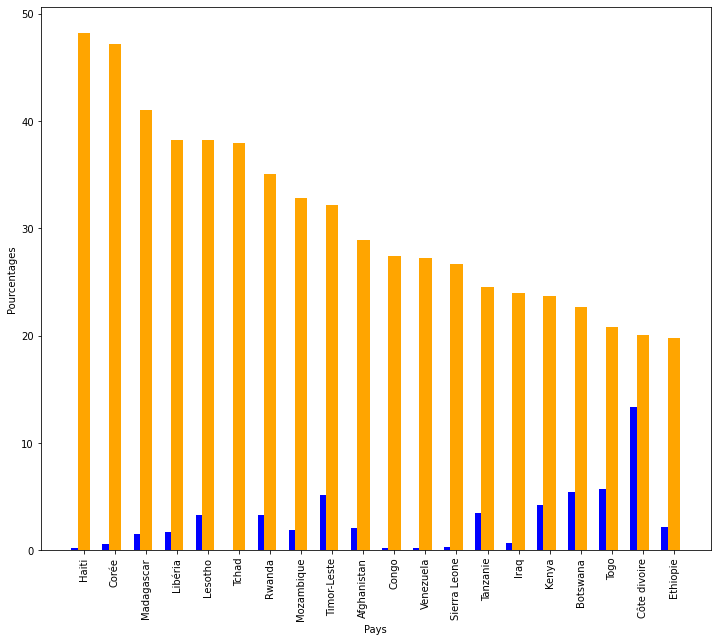

In [34]:
y1 = sous_nutri_export_propo20['proportion exportation']
y2 = sous_nutri_export_propo20['proportion sous nutrition']
x = np.arange(20)
width = 0.4
plt.figure(figsize = (12,10))
plt.bar(x-0.2, y1, width, color='blue') 
plt.bar(x, y2, width, color='orange') 
plt.xticks(x, ['Haiti', 'Corée','Madagascar','Libéria','Lesotho',
               'Tchad','Rwanda','Mozambique','Timor-Leste','Afghanistan','Congo',
               'Venezuela','Sierra Leone','Tanzanie','Iraq','Kenya','Botswana','Togo','Côte divoire','Ethiopie']) 
plt.xticks(rotation=90)
plt.xlabel("Pays") 
plt.ylabel("Pourcentages") 
plt.show()

### Conclusion de cette recherche: on ne peut donc pas voir de lien entre taux d'exportation et sous nutrition    car ,à part certaines exeptions , le taux d'exportations des pays les plus en sous nutritions sont très bas 